# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2024-07-31 23:22:58.328526: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-31 23:22:58.328552: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)# YOUR CODE HERE

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<The data set that I chose to analyze is the Census Dataset. Using this dataset, I will be predicting whether an individual's income will be over $50,000 per year. This problem is a predction task and the label is "income_binary". This is a supervised learning model. This problem ultimately uses labeled data, which mean that every record is tagged with the income category. We are classifying individuals into one of two income categories. This means that this is a binary classification problem, where individuals can be classified above $50,000 and below $50,000. The features in this problem are classified as numerical and categorical. The numerical features include fields like age, fnlwgt, education-num, captial-gain, captial-loss, and hours-per-week. The categorical features include workclass, education, marital-status, occupation, relationship, race, sex_selfID, and native country. Overall, this is important because it can be applied in various ways for companies. This model could help with company marketing strategies, tailing specific ads and marketing efforts based on predicted income levels, resulting in more personalized ads. Additionally, this could be used in risk assessment purposes in insurance comapnies. Companies can assess riks profiles based on their income, helping them design insurance policies for specific income groups.>

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29716 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29716 non-null  float64
 1   workclass       29716 non-null  object 
 2   fnlwgt          29716 non-null  int64  
 3   education       29716 non-null  object 
 4   education-num   29716 non-null  int64  
 5   marital-status  29716 non-null  object 
 6   occupation      29716 non-null  object 
 7   relationship    29716 non-null  object 
 8   race            29716 non-null  object 
 9   sex_selfID      29716 non-null  object 
 10  capital-gain    29716 non-null  int64  
 11  capital-loss    29716 non-null  int64  
 12  hours-per-week  29716 non-null  float64
 13  native-country  29716 non-null  object 
 14  income_binary   29716 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.6+ MB
None
                age        fnlwgt  education-num  capital-g

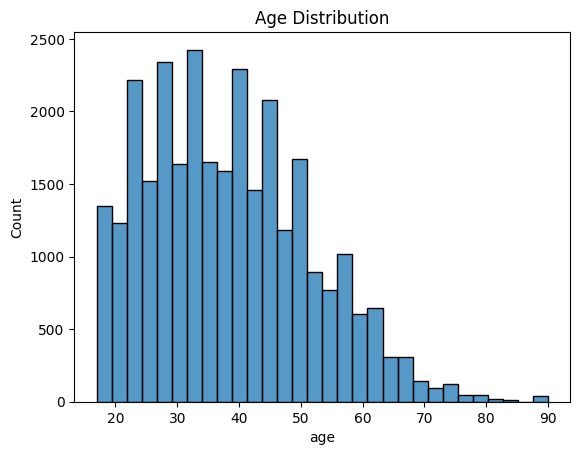

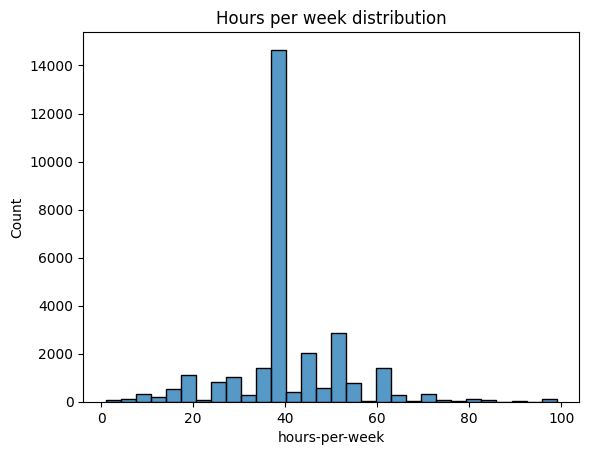

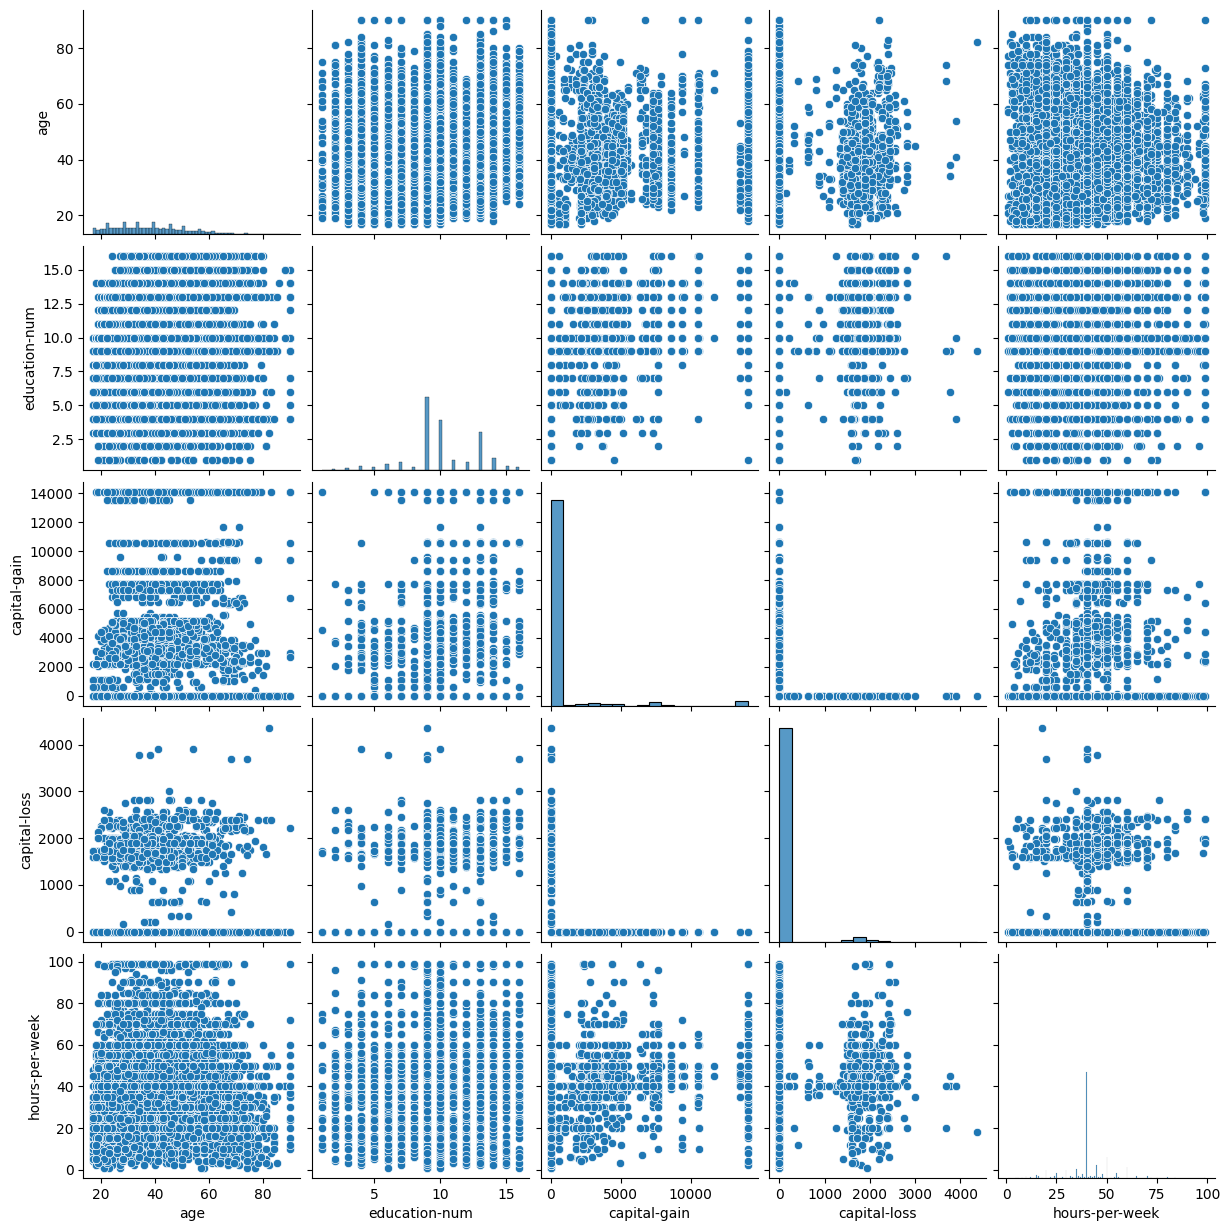

In [4]:
# YOUR CODE HERE
df.dropna(inplace=True)

print(df.info())

print(df.describe())

print(df.isnull().sum())

sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['hours-per-week'], bins=30)
plt.title('Hours per week distribution')
plt.show()

sns.pairplot(df[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])
plt.show()


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

< For this project, we will be able to reatial all of the orignal features as they provide valuable information for predicting income levels. We will keep the numerical and categorical features. When it comes to preparing the data, we will handle te missing values using SimpleImputer to fill in missing values, using the mean for numerical features and the most frequent values for categorical features. We will handle and identify outliers using Z-score and other statistical methods to decide whether to remove or transform outliers. We can also use OneHot Encoding to convert categorical features into numerical format. We can also use feature scaling to standardize numerical features which will help the neural network converge. Our primary model is a neural netowrk with multiple dense and dropout layers to prevent overfitting. We will use ReLU for hidden layers to activate them and sigmoid for the output layer. TO train the model, we will first split the dataset into training and testing datasets. We will split them with 80% for training and 20% for testing. We will train the neural netowrk model with the training data and use early stopping to prevent overfitting. We will accomplish this by monitoring the validation loss. THen we will evaluate the model on accuracy, precision, recall, and F1-score. Then we will experienment with various architecutes, batch sizes and the number of epochs to find what would be optimal. Once we have established this, we can compare the performance of the meodel with other models. Then we can fine tune hyperpara

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [5]:
# YOUR CODE HERE

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
target = 'income_binary'

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = df.drop(target, axis=1)
y = df[target].apply(lambda x: 1 if x == '>50K' else 0)  # Convert to binary (0 and 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = preprocessor.fit_transform(X_train).toarray()
X_test = preprocessor.transform(X_test).toarray() 

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

2024-07-31 23:24:16.575245: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-07-31 23:24:16.575268: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-31 23:24:16.575325: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-07f8f19e788967896): /proc/driver/nvidia/version does not exist
2024-07-31 23:24:16.575509: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 23:24:16.681657: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                6720      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
595/595 [==============================] - 1s 917us/step - loss: 0.3985 - accuracy: 0.8122 - val_loss: 0.3360

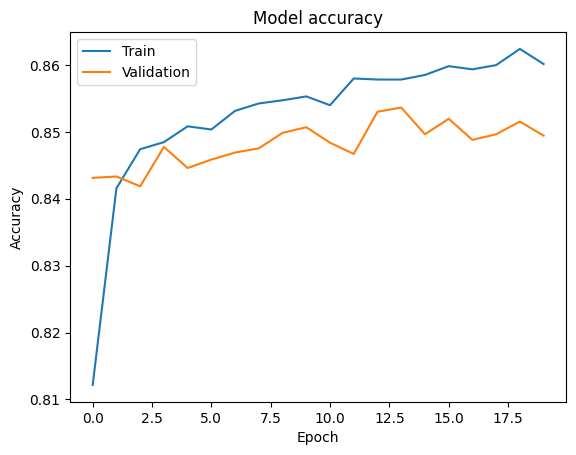

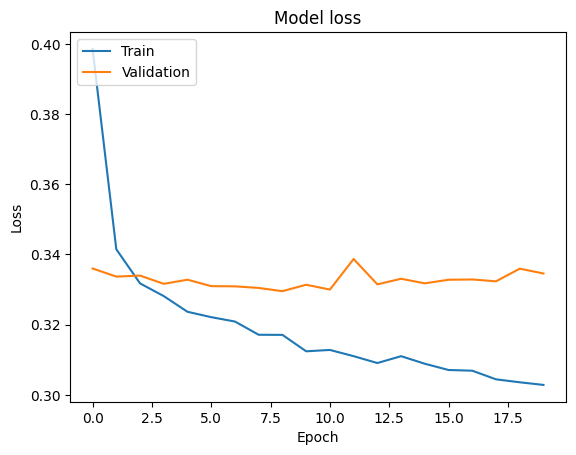

Epoch 1/50
595/595 [==============================] - 0s 783us/step - loss: 0.3023 - accuracy: 0.8608 - val_loss: 0.3338 - val_accuracy: 0.8511
Epoch 2/50
595/595 [==============================] - 0s 760us/step - loss: 0.3013 - accuracy: 0.8597 - val_loss: 0.3340 - val_accuracy: 0.8522
Epoch 3/50
595/595 [==============================] - 0s 754us/step - loss: 0.3016 - accuracy: 0.8621 - val_loss: 0.3347 - val_accuracy: 0.8526
Epoch 4/50
186/186 [==============================] - 0s 435us/step - loss: 0.3085 - accuracy: 0.8546
Test Accuracy after tuning: 0.8546


In [6]:
# YOUR CODE HERE
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy after tuning: {accuracy:.4f}')
